In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    precision_recall_curve, average_precision_score, roc_curve
)

from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import learning_curve

In [5]:
df=pd.read_excel('augmented_dataset_shuffled.xlsx')

In [6]:
# Encodage de la feature (level)
level_encoder = LabelEncoder()  # Nouvelle instance !
df['level'] = level_encoder.fit_transform(df['level'])  # 3 classes
print('bien')

bien


In [7]:
variables = ['event_id','label' ]  

# 3. figure avec subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))

# 4. les graphiques pour chaque variable
for i, var in enumerate(variables):
    # Histogramme + Courbe de densité
    sns.histplot(df[var], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution de {var}", fontsize=12)
    axes[i].set_xlabel("")
   
# 5.la mise en page
plt.tight_layout()

# 6. Sauvegarde en PNG 
plt.savefig("distributions.png", dpi=300, bbox_inches="tight")
plt.close()  # Fermeture de la figure

print("Graphique sauvegardé sous 'dist.png'")

Graphique sauvegardé sous 'dist.png'


In [8]:
# Définition des features (X) et la cible (y)
X = df[['cpu_usage','ram_usage','disk_usage', 'level', 'temperature','read_errors','write_errors','reallocated_sectors', 'event_id']] 
y = df['label']

In [9]:
# Dvision en ensemble d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Encodage des labels 
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print('bien')


bien


In [11]:
# Vérification du nombre de classes
num_classe = len(np.unique(y_train_encoded))
print(f"Nombre de classes : {num_classe}")

Nombre de classes : 12


In [12]:
import numpy as np
def add_noise(X, noise_level=0.004):
    noise = np.random.normal(scale=noise_level*X.std(axis=0), size=X.shape)
    return X + noise

X_train_noisy = add_noise(X_train)
X_trained=X_train_noisy
X_test_noisy= add_noise(X_test)
X_tested=X_test_noisy

In [13]:
print(f"{num_classe}")

12


In [14]:
# Calcul du ratio des classes pour gérer le déséquilibre
class_weights = len(y_train) / (num_classe * np.bincount(y_train_encoded))

In [15]:
# 2. Modèle avec paramètres anti-sur-apprentissage

model = XGBClassifier(
    objective='multi:softmax',  # Spécifique aux classes multiples
    num_class=num_classe,      # Nombre de classes
    eval_metric='mlogloss',     # Métrique pour multi-classes
    scale_pos_weight=class_weights,  # Poids personnalisé 
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    early_stopping_rounds=10,
    random_state=42
)


In [16]:
# 3. Entraînement avec validation
model.fit(
    X_trained, y_train_encoded,
    eval_set=[(X_tested, y_test_encoded )],
    verbose=True
)

[0]	validation_0-mlogloss:2.04927


C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\callback.py:386: UserWarning: [19:12:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  self.starting_round = model.num_boosted_rounds()


[1]	validation_0-mlogloss:1.76252
[2]	validation_0-mlogloss:1.54564
[3]	validation_0-mlogloss:1.38528
[4]	validation_0-mlogloss:1.25559
[5]	validation_0-mlogloss:1.13571
[6]	validation_0-mlogloss:1.04135
[7]	validation_0-mlogloss:0.96191
[8]	validation_0-mlogloss:0.89192
[9]	validation_0-mlogloss:0.82763
[10]	validation_0-mlogloss:0.76954
[11]	validation_0-mlogloss:0.72006
[12]	validation_0-mlogloss:0.67117
[13]	validation_0-mlogloss:0.62823
[14]	validation_0-mlogloss:0.58984
[15]	validation_0-mlogloss:0.55679
[16]	validation_0-mlogloss:0.52544
[17]	validation_0-mlogloss:0.49624
[18]	validation_0-mlogloss:0.47165
[19]	validation_0-mlogloss:0.44840
[20]	validation_0-mlogloss:0.42735
[21]	validation_0-mlogloss:0.40915
[22]	validation_0-mlogloss:0.39295
[23]	validation_0-mlogloss:0.37700
[24]	validation_0-mlogloss:0.36332
[25]	validation_0-mlogloss:0.35036
[26]	validation_0-mlogloss:0.33895
[27]	validation_0-mlogloss:0.32792
[28]	validation_0-mlogloss:0.31766
[29]	validation_0-mlogloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=12, ...)

In [17]:
y_pred = model.predict(X_tested)
y_proba = model.predict_proba(X_tested)  # Probabilités par classe

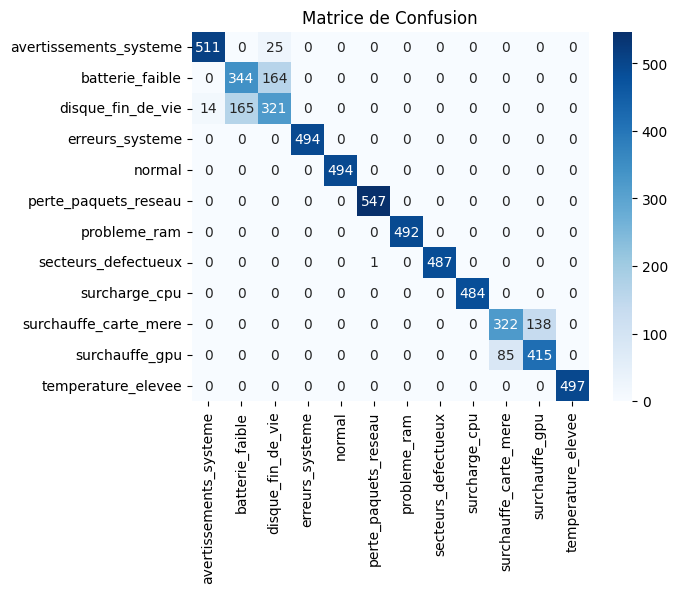

In [18]:
# Matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matrice de Confusion")
plt.savefig('good_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# 4. Calcul de l'accuracy sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_trained)
y_test_pred = model.predict(X_tested)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print("Accuracy sur l'entraînement (modèle par défaut) :", train_accuracy)
print("Accuracy sur le test (modèle par défaut) :", test_accuracy)

Accuracy sur l'entraînement (modèle par défaut) : 0.9329166666666666
Accuracy sur le test (modèle par défaut) : 0.9013333333333333


In [20]:
# Validation croisée (sans early stopping)
model_no_early_stop = XGBClassifier(
    **{k: v for k, v in model.get_params().items() if k != 'early_stopping_rounds'},
    early_stopping_rounds=None
)
scores = cross_val_score(model_no_early_stop, X_trained, y_train_encoded, cv=5, scoring='accuracy')
print(f"Accuracy CV: {scores.mean():.2f} ± {scores.std():.2f}")


NameError: name 'cross_val_score' is not defined

In [ ]:
# 4. Métriques Globales
accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

print("="*50)
print("Métriques Globales".center(50))
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (moyenne pondérée): {precision:.4f}")
print(f"Recall (moyenne pondérée): {recall:.4f}")
print(f"F1-Score (moyenne pondérée): {f1:.4f}")


In [ ]:
# 6. Matrice de Confusion
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_encoded, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Classe {i}" for i in np.unique(y_train_encoded)],
            yticklabels=[f"Classe {i}" for i in np.unique(y_train_encoded)])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité Terrain")
plt.savefig('matrice_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

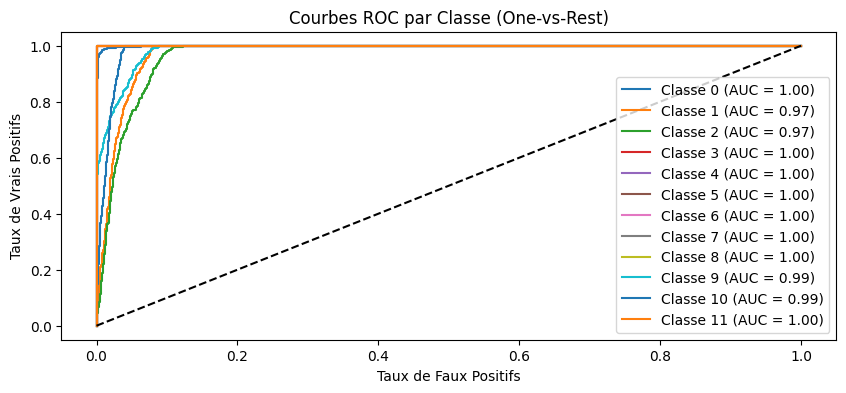

In [23]:

# 7. Courbes ROC (One-vs-Rest)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 4))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC par Classe (One-vs-Rest)')
plt.legend()
plt.savefig('courbe_roc.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 8. Feature Importance
plt.figure(figsize=(4, 4))
plot_importance(model, max_num_features=10)
plt.title('Importance des Features (Gain)')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


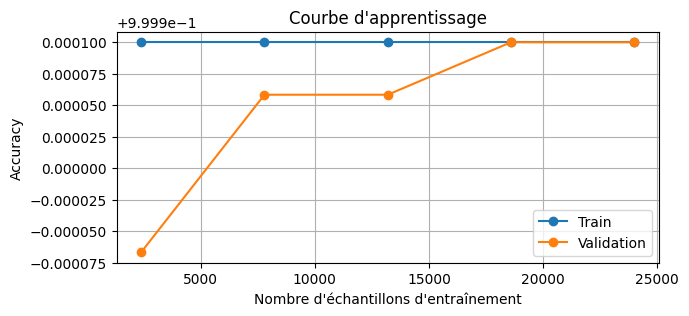

In [22]:
# 1. Créer une copie du modèle SANS early stopping pour la validation croisée
from sklearn.model_selection import learning_curve, KFold
# 1. Configuration du modèle
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_encoded)),
    eval_metric='mlogloss',
    early_stopping_rounds=10,
    random_state=42
)

# 2. Paramètres de la courbe d'apprentissage
n_splits = 5
train_sizes = np.linspace(0.1, 1.0, 5)  # Fractions du dataset (10% à 100%)
train_scores = np.zeros((n_splits, len(train_sizes)))
test_scores = np.zeros((n_splits, len(train_sizes)))

# 3. Validation croisée manuelle
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_trained)):
    X_fold_train_full = X_trained.iloc[train_idx]
    y_fold_train_full = y_train_encoded[train_idx]
   
    for size_idx, size_frac in enumerate(train_sizes):
        # Sous-échantillonnage progressif
        n_samples = int(size_frac * len(train_idx))
        subset_idx = np.random.choice(train_idx, n_samples, replace=False)
       
        X_fold_train = X_train.iloc[subset_idx]
        y_fold_train = y_train_encoded[subset_idx]
        X_fold_val = X_train.iloc[val_idx]
        y_fold_val = y_train_encoded[val_idx]
       
        # Entraînement avec early stopping
        model.fit(
            X_fold_train, y_fold_train,
            eval_set=[(X_fold_val, y_fold_val)],
            verbose=False
        )
       
        # Enregistrement des scores
        train_scores[fold_idx, size_idx] = model.score(X_fold_train, y_fold_train)
        test_scores[fold_idx, size_idx] = model.score(X_fold_val, y_fold_val)

# 4. Calcul des tailles réelles (nombre d'échantillons)
train_sizes_abs = [int(size_frac * len(X_trained)) for size_frac in train_sizes]

# 5. Visualisation corrigée
plt.figure(figsize=(7, 3))
plt.plot(train_sizes_abs, np.mean(train_scores, axis=0), 'o-', label='Train')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=0), 'o-', label='Validation')
plt.xlabel('Nombre d\'échantillons d\'entraînement')
plt.ylabel('Accuracy')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid()
plt.show()


In [39]:
# 9. Courbe d'Apprentissage
# 4. Métriques Globales
accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

print("="*50)
print("Métriques Globales".center(50))
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (moyenne pondérée): {precision:.4f}")
print(f"Recall (moyenne pondérée): {recall:.4f}")
print(f"F1-Score (moyenne pondérée): {f1:.4f}")


                Métriques Globales                
Accuracy: 1.0000
Precision (moyenne pondérée): 1.0000
Recall (moyenne pondérée): 1.0000
F1-Score (moyenne pondérée): 1.0000


In [89]:
import joblib
import pickle
import os
import json
import xgboost as xgb
# 3. Sauvegarde dans différents formats
model_dir = "model_deployment"
os.makedirs(model_dir, exist_ok=True)

# Format natif XGBoost (optimal pour les performances)
model.save_model(f"{model_dir}/modl.xgb")

# Format pickle (compatible scikit-learn)
with open(f"{model_dir}/modl.pkl", 'wb') as f:
    pickle.dump(model, f)

# Format joblib (meilleur pour les gros modèles)
joblib.dump(model, f"{model_dir}/modl.joblib")

# 4. Sauvegarde des métadonnées
metadata = {
    "features": list(X_trained.columns),
    "target_classes": {i: str(cls) for i, cls in enumerate(np.unique(y_train))},
    "accuracy": float(accuracy_score(y_test_encoded, y_test_pred)),
    "xgboost_version": xgb.__version__
}

with open(f"{model_dir}/metdata.json", 'w') as f:
    json.dump(metadata, f, indent=4)

print("Modèle et métadonnées sauvegardés dans:", model_dir)


C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


Modèle et métadonnées sauvegardés dans: model_deployment
